In [1]:
import sys
sys.path.append("/workdir")
sys.path.append("/workdir/funcs")
import os 
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from dammy_dcm import Dammy
from dcm import Dcm
import pydicom
from PIL import Image

# サンプルデータの作成 
今回はtestという症例にT1とT2強調シーケンスで撮像したデータがあると仮定し、  
T1、T2とそれらを重ねたoverlayをdicomファイル化する  
注意：データのdtypeは整数型でないといけない（floatだった場合にクラス内にdtypeを変えるメソッドあり）

(32, 256, 256)


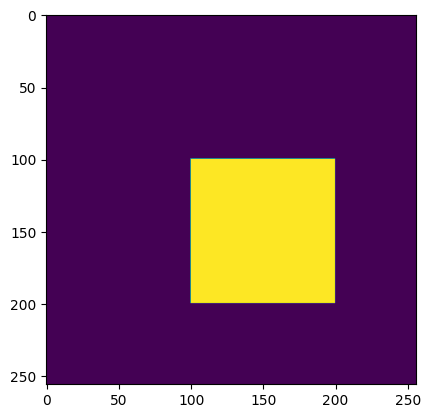

In [14]:
#T1 dammy data
T1data = np.zeros((256,256),dtype = "int32") 
T1data[100:200,100:200] = np.iinfo("int32").max
plt.imshow(T1data)
T1data = np.stack([T1data]*32,axis = 0)
print(T1data.shape)

(32, 256, 256)


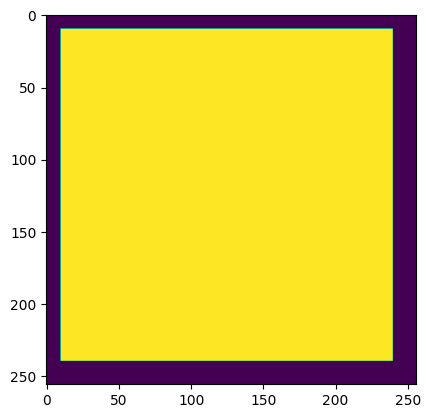

In [15]:
#T2 dammy data
T2data = np.zeros((256,256),dtype = "uint8") 
T2data[10:240,10:240] = np.iinfo("uint8").max
plt.imshow(T2data)
T2data = np.stack([T2data]*32, 0)
print(T2data.shape)

### overlay画像(重ねた画像)を作成

(32, 256, 256, 3) uint8


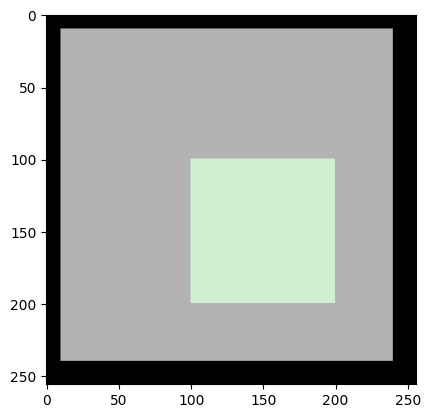

In [16]:
# overlay画像(重ねた画像)　dammy data
dcm= Dcm()
overlaydata = dcm.overlay(T2data,T1data)
print(overlaydata.shape, overlaydata.dtype)
plt.imshow(overlaydata[0])

# case毎で処理画像群の辞書を作成

In [17]:
data_dic={
"T1":T1data,
"T2":T2data,
"overlay":overlaydata
}

# dicomファイルの作成 case＝症例名

In [18]:
dcm.np2dcm(data_dic, case = "test", savedir=".")